In [1]:
import numpy as np
import pandas as pd
import math 
import regex as re
from datetime import datetime
import timedelta as td
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def abriPlanilha():
    for arquivo in os.listdir('.'):
        if (re.findall('csv', arquivo)):
            return arquivo
    
ins = pd.read_csv(abriPlanilha()
                 ,header=1
                 ,sep=','
                 ,low_memory=True
                 )

In [3]:
colunas=['col1','col2','col3','situacao','nroInscricao','nome',
        'cpf','dataNascimento','genero','escolaridade',
        'instituicao','telefone','email','cep','bairro',
        'cidade','incluiOutro','perfil','observacao','perfis']

ins.columns=colunas

In [4]:
def columnsDrop():
    ins.drop('situacao', axis=1, inplace=True)
    ins.dropna(axis=1, how='all', inplace=True)
    ins.dropna(axis=0, how='all', inplace=True)

columnsDrop()

In [5]:
def columnsInsert():
    ins.insert(3, 'cpfAjustado', '')
    ins.insert(5, 'idade', 0)
    ins.insert(6, 'dataNascAjustada', ' ')
    ins.insert(8, 'generoId', 99)
    ins.insert(10, 'escolaridadeId', 0)
    ins.insert(11, 'escolaridade2', ' ')
    ins.insert(13, 'instituicaoId', 0)
    ins.insert(15, 'telefoneAjustado', '')
    ins.insert(18, 'cepAjustado', '')
    ins.insert(21, 'cidadeId', 0)
    ins.insert(25, 'tamanhoCamisetaId', 0)

columnsInsert()

In [6]:
ins.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, 0 to 49
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   nroInscricao       50 non-null     object
 1   nome               50 non-null     object
 2   cpf                50 non-null     object
 3   cpfAjustado        50 non-null     object
 4   dataNascimento     50 non-null     object
 5   idade              50 non-null     int64 
 6   dataNascAjustada   50 non-null     object
 7   genero             50 non-null     object
 8   generoId           50 non-null     int64 
 9   escolaridade       50 non-null     object
 10  escolaridadeId     50 non-null     int64 
 11  escolaridade2      50 non-null     object
 12  instituicao        43 non-null     object
 13  instituicaoId      50 non-null     int64 
 14  telefone           49 non-null     object
 15  telefoneAjustado   50 non-null     object
 16  email              50 non-null     object
 17  cep 

In [7]:
ins.head(3)

,nroInscricao,nome,cpf,cpfAjustado,dataNascimento,idade,dataNascAjustada,genero,generoId,escolaridade,...,email,cep,cepAjustado,bairro,cidade,cidadeId,incluiOutro,perfil,observacao,tamanhoCamisetaId
0,1,Isabelle Victoria Pereira De Souza,51454217880,,12/09/2003,0,,Feminino,99,Ensino Superior,...,isabellevictoria.urs@gmail.com,08121-620,,Jd Nélia,São Paulo,0,N,Desenvolvedor,Tamanho de Camiseta: M,0
1,2,Guilherme Antunes de Campos,50069148821,,03/06/2004,0,,Masculino,99,Ensino Superior Cursando,...,guiancam@gmail.com,7091000,,Vila Progresso,Guarulhos,0,N,Desenvolvedor,Tamanho de Camiseta: G,0
2,3,Wezilyana Melice Farias de Lima,1264343442,,13/08/1983,0,,Feminino,99,Pós-graduação completo,...,lilyfarias@gmail.com,1529001,,Aclimação,São Paulo,0,N,Analista de Negócios,Tamanho de Camiseta: M,0


In [8]:
def cpfAjustado(cpf) -> str:
    pattern='([0-9]{3})([.])([0-9]{3})([.])([0-9]{3})([-])([0-9]{2})'
    if (re.search(pattern, cpf)):
        return cpf
    
    cpf=re.sub('[\.\-]','',cpf); cpf=cpf.zfill(11)
        
    pattern='([0-9]{3})([0-9]{3})([0-9]{3})([0-9]{2})'
    cpf=re.search(pattern, cpf)
    cpf='{}.{}.{}-{}'.format(cpf.group(1)
                            ,cpf.group(2)
                            ,cpf.group(3)
                            ,cpf.group(4)
                            )
    return cpf

def dataNascAjustada(pDataNascimento : str, éIdade : bool = False):
    dtNasc=pDataNascimento; dtRef=''
    #   
    pattern='([0-9]{1,2})([/])([0-9]{1,2})([/])([0-9]{2,4})'
        
    if (not re.search(pattern, dtNasc)):
        if (len(dtNasc)==6 or len(dtNasc)==8):
            pattern='([0-9]{2})([0-9]{2})([0-9]{2,4})'
            dtNasc=re.search(pattern, dtNasc)
            if (dtNasc):
                dtNasc='{}/{}/{}'.format(dtNasc.group(1),
                                        dtNasc.group(2),
                                        dtNasc.group(3)
                                        )
            else:
                return -1
            
        else:
            return -1
        
    dtNasc=datetime.strptime(dtNasc, '%d/%m/%Y')
                
    if (éIdade):
        diferencaData=(datetime.today()-dtNasc)
        dias=diferencaData.days
        anos, dias = divmod(dias, 365)
        dtRef=anos
    else:
        dtRef=dtNasc.strftime('%d/%m/%Y %H:%M:%S')
    
    return dtRef

def quantGenero(genero) -> int:
    if (genero.upper()=='FEMININO'):
        return 1
    elif (genero.upper()=='MASCULINO'):
        return 2
    else:
        return 99
    
def quantEscolaridade(escolaridade) -> int:
    escolaridade=escolaridade.upper()
    valor=-1
    if re.findall('M[EÉ]DIO', escolaridade):
        valor=10
    elif (re.findall('SUPERIOR', escolaridade) or
         re.findall('FACULDADE', escolaridade)):
        valor=20
    elif re.findall('P[ÓO]S', escolaridade):
        valor=30
    elif re.findall('MESTRADO', escolaridade):
        valor=40
    elif re.findall('DOUTORADO', escolaridade):
        valor=50
    else:
        return valor
          
    if (not (re.findall('INCOMPLETO', escolaridade) or 
        re.findall('CURSANDO', escolaridade))):
        valor+=5
        
    return valor

def qualEscolaridade(escolaridade) -> str:
    escolaridade=escolaridade.upper()
    texto='N/D'
    if re.findall('M[EÉ]DIO', escolaridade):
        texto='ENS.MÉDIO'
    elif (re.findall('SUPERIOR', escolaridade) or
         re.findall('FACULDADE', escolaridade) or
         re.findall('BACHAREL', escolaridade)
         ):
        texto='ENS.SUPERIOR'
    elif re.findall('P[ÓO]S', escolaridade):
        texto='PÓS-GRADUAÇÃO'
    elif re.findall('MESTRADO', escolaridade):
        texto='MESTRADO'
    elif re.findall('DOUTORADO', escolaridade):
        texto='DOUTORADO'
    else:
        return texto
          
    if (not (re.findall('INCOMPLETO', escolaridade) or 
        re.findall('CURSANDO', escolaridade) or
        re.findall('ANDAMENTO', escolaridade))):
        texto=texto+' COMPLETO'
    else:
        texto=texto+' INCOMPLETO/CURSANDO'
        
    return texto

def telefoneAjustado(fone) -> str:
    #print('Telefone: {}'.format(fone))

    if (pd.isnull(fone)):
        #print('Não informado!'); print('----------------')
        return 'Não informado!'
    
    pattern='([\(])([0-9]{2})([\)])([\ ])([0-9]{5})([-])([0-9]{4})'
    if (re.search(pattern, fone)):
        print('foneCond.1: '+fone); print('----------------')
        return fone

    for char in ([' ','-','\(','\)']):
        fone=re.sub(char,'',fone)
    
    pattern='([0-9]{2})([0-9]{5})([0-9]{4})'
    if (re.search(pattern, fone) and (not re.search('^55', fone))): 
        fone=re.search(pattern, fone)
        fone='({}) {}-{}'.format(fone.group(1)
                                 ,fone.group(2)
                                 ,fone.group(3)
                                )
        #print('foneCond.2: '+fone); print('----------------')
    elif (re.search('^55',fone)):
        pattern = '([0-9]{2})([0-9]{2})([0-9]{5})([0-9]{4})'
        fone=re.search(pattern, fone)
        fone='({}) {}-{}'.format(
                                fone.group(2)
                                ,fone.group(3)
                                ,fone.group(4)
                                )
        #print('foneCond.3: '+fone); print('----------------')
    else:
        #print('Inválido'); print('----------------')
        fone='Inválido'

    return fone

def quantInstituicao(pInstituicao) -> int:
    tp=type(pInstituicao)
    if (tp==str):
        pInst=pInstituicao.upper()
        
        if (re.findall('BELAS ARTES', pInst)):
            return 1
        elif (re.findall('FATEC', pInst)):
            return 2
        elif (re.findall('WYDEN', pInst)):
            return 3
        elif (re.findall('JUDAS', pInst)):
            return 4
        elif (re.findall('IFSP', pInst) or re.findall('INSTITUTO FEDERAL', pInst)):
            return 5
        elif (re.findall('ENIAC', pInst)):
            return 6
        elif (re.findall('FIAP', pInst)):
            return 7
        elif (re.findall('FAM', pInst)):
            return 8
        elif (re.findall('UNICAMP', pInst)):
            return 9
        elif (re.findall('ETEC', pInst)):
            return 10
        elif (re.findall('LICEU', pInst)):
            return 11
        elif (re.findall('MOACYR CAMPOS', pInst)):
            return 12
        elif (re.findall('USP', pInst) or re.findall('UNIVERSIDADE DE S[AÃ]O PAULO', pInst)):
            return 13
        elif (re.findall('DRUMMOND', pInst)):
            return 14
        elif (re.findall('IMPACTA', pInst)):
            return 15
        elif (re.findall('VUNESP', pInst)):
            return 16
        elif (re.findall('SAL[EÉ]M', pInst)):
            return 17
        elif (re.findall('TORRICELLI', pInst)):
            return 18
        else:
            return 99
      
    elif (tp==float):
        return 0

    return 99

def cepAjustado(cep) -> str:
    pattern='([0-9]{5})([-]{1})([0-9]{3})'
    if (not re.search(pattern, cep)):
        cep=re.sub('-','', cep)
        cep=cep.zfill(8)
        pattern='([0-9]{5})([0-9]{3})'
        cep=re.search(pattern, cep)
        cep='{}-{}'.format(cep.group(1),cep.group(2))
    return cep

def quantCidade(cidade) -> int:
    cidade=cidade.upper()
    if re.findall('GUARULHOS', cidade):
        return 1
    elif re.findall('S[ÃA]O PAULO', cidade):
        return 2
    elif re.findall('RIBEIR[ÃA]O PRETO', cidade):
        return 3
    elif re.findall('SANTO ANDR[ÉE]', cidade):
        return 4
    elif re.findall('GUARUJ[ÁA]', cidade):
        return 5
    elif re.findall('IGARAT[ÁA]', cidade):
        return 6
    elif re.findall('CARAPICU[ÍI]BA', cidade):
        return 7
    elif re.findall('S[ÃA]O VICENTE', cidade):
        return 8
    else:
        return 99

def quantTamanhoCamiseta(pTamanho) -> int:
    t=re.split('\s',pTamanho)
    if (t[len(t)-1]=='P'):
        return 1
    elif (t[len(t)-1]=='M'):
        return 2
    elif (t[len(t)-1]=='G'):
        return 3
    elif (t[len(t)-1]=='GG'):
        return 4
    else:
        return 99    


In [9]:
ins['cpfAjustado']=ins['cpf'].apply(lambda cpf: cpfAjustado(cpf))
ins['idade']=ins['dataNascimento'].apply(lambda dtNasc: dataNascAjustada(dtNasc, True))
ins['dataNascAjustada']=ins['dataNascimento'].apply(lambda dtNasc: dataNascAjustada(dtNasc, False))
ins['generoId']=ins['genero'].apply(lambda genero: quantGenero(genero))
ins['escolaridadeId']=ins['escolaridade'].apply(lambda escolaridade: quantEscolaridade(escolaridade))
ins['escolaridade2']=ins['escolaridade'].apply(lambda escolaridade: qualEscolaridade(escolaridade))
ins['instituicaoId']=ins['instituicao'].apply(lambda instituicao: quantInstituicao(instituicao))
ins['telefoneAjustado']=ins['telefone'].apply(lambda fone: telefoneAjustado(fone))
ins['cepAjustado']=ins['cep'].apply(lambda cep : cepAjustado(cep))
ins['cidadeId']=ins['cidade'].apply(lambda cidade: quantCidade(cidade))
ins['tamanhoCamisetaId']=ins['observacao'].apply(lambda obs: quantTamanhoCamiseta(obs))

foneCond.1: (11) 94585-0708
----------------
foneCond.1: (11) 98260-1703
----------------
foneCond.1: (19) 98448-7675
----------------
foneCond.1: (11) 96031-9033
----------------
foneCond.1: (11) 93315-9810
----------------
foneCond.1: (11) 98702-2018
----------------
foneCond.1: (19) 99735-5068
----------------
foneCond.1: (11) 97269-3722
----------------
foneCond.1: (13) 99164-5376
----------------


In [10]:
ins

,nroInscricao,nome,cpf,cpfAjustado,dataNascimento,idade,dataNascAjustada,genero,generoId,escolaridade,...,email,cep,cepAjustado,bairro,cidade,cidadeId,incluiOutro,perfil,observacao,tamanhoCamisetaId
0,1,Isabelle Victoria Pereira De Souza,51454217880,514.542.178-80,12/09/2003,20,12/09/2003 00:00:00,Feminino,1,Ensino Superior,...,isabellevictoria.urs@gmail.com,08121-620,08121-620,Jd Nélia,São Paulo,2,N,Desenvolvedor,Tamanho de Camiseta: M,2
1,2,Guilherme Antunes de Campos,50069148821,500.691.488-21,03/06/2004,19,03/06/2004 00:00:00,Masculino,2,Ensino Superior Cursando,...,guiancam@gmail.com,7091000,07091-000,Vila Progresso,Guarulhos,1,N,Desenvolvedor,Tamanho de Camiseta: G,3
2,3,Wezilyana Melice Farias de Lima,1264343442,012.643.434-42,13/08/1983,40,13/08/1983 00:00:00,Feminino,1,Pós-graduação completo,...,lilyfarias@gmail.com,1529001,01529-001,Aclimação,São Paulo,2,N,Analista de Negócios,Tamanho de Camiseta: M,2
3,4,Jéssica Bueno Ramos,51713271818,517.132.718-18,11/01/2005,19,11/01/2005 00:00:00,Feminino,1,Ensino Superior Cursando,...,jessicabuenoramos5@gmail.com,7141420,07141-420,Jardim Santa Emília,Guarulhos,1,N,Universitário,Tamanho de Camiseta: M,2
4,5,Gabriel Vinícius Rocha Barboza,46993988801,469.939.888-01,17/01/2005,19,17/01/2005 00:00:00,Masculino,2,Cursando Ensino Superior em Análise e desenvol...,...,gabrielrochabarboza@gmail.com,07135-720,07135-720,Vila Sítio dos Morros,Guarulhos,1,N,Desenvolvedor,Tamanho de Camiseta: G,3
5,6,Richard Klaoss Neumann,54807928813,548.079.288-13,30/07/2005,18,30/07/2005 00:00:00,Masculino,2,Ensino médio e técnico completo,...,richardklaossneumann@gmail.com,7230450,07230-450,Parque Uirapuru,Guarulhos,1,N,Estudante de programação e concurso,Tamanho de Camiseta: G,3
6,7,Cristofer Batista da Silva,48859050871,488.590.508-71,14/02/2005,19,14/02/2005 00:00:00,Masculino,2,Ensino Médio Completo,...,cristofersilva.rp@gmail.com,14050220,14050-220,Vila Amélia,Ribeirão Preto,3,N,Empreendedor e Designer de UX,Tamanho de Camiseta: G,3
7,8,Thiago Henrique Silva,38298390814,382.983.908-14,22/06/2002,21,22/06/2002 00:00:00,Masculino,2,Ensino Superior Incompleto,...,thiago@roihack.com.br,14051-330,14051-330,Sumarezinho,Ribeirão Preto,3,N,Analista de Negócios,Tamanho de Camiseta: M,2
8,9,Anaíle Silva de Oliveira,23033966896,230.339.668-96,19/02/2002,22,19/02/2002 00:00:00,Feminino,1,Ensino Superior Incompleto,...,autoconhecimento.ana@gmail.com,7113090,07113-090,Macedo,Guarulhos,1,N,Meu Primeiro Hackathon,Tamanho de Camiseta: M,2
9,10,Leonardo dos Reis Souza,53872905880,538.729.058-80,23/09/2003,20,23/09/2003 00:00:00,Masculino,2,Cursando superior,...,leonardoleoreissouza05@gmail.com,08490-600,08490-600,Cidade Tiradentes,São Paulo,2,N,Desenvolvedor,Tamanho de Camiseta: M,2


In [11]:
X = ins['escolaridade2']
y = ins['idade']

### Gráficos

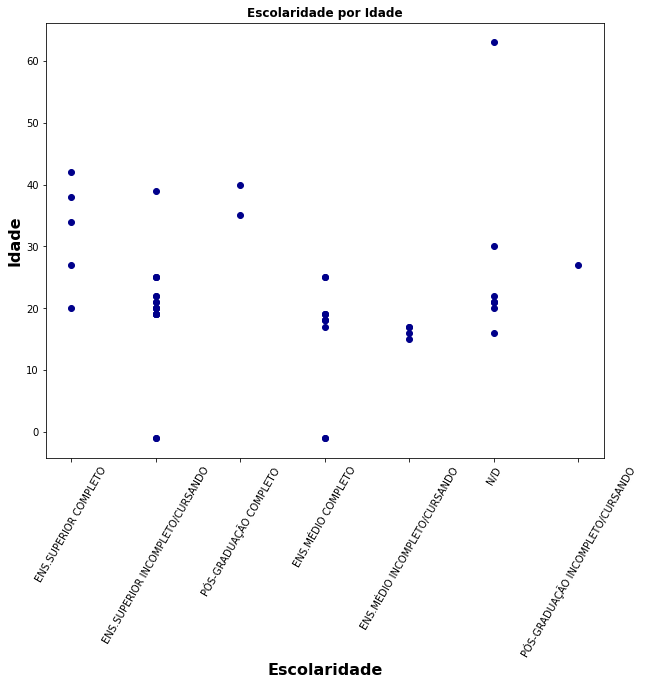

In [12]:
def grafico1(X, y):
    plt.figure(figsize=(10,8))
    plt.title('Escolaridade por Idade', fontdict={'weight':'bold'})
    plt.scatter(X,y,c='darkblue',marker='o')
    plt.xlabel('Escolaridade', fontdict={'weight':'bold','size':16})
    plt.ylabel('Idade', fontdict={'weight':'bold','size':16})
    plt.xticks(rotation=60)
    plt.show()
    
grafico1(X, y)

In [13]:
ins.to_html('Hackathon 2024.html'
           ,justify='left')

In [14]:
#### End

In [15]:
def verificaEmail(email):
    pattern='([a+-z+])([@]{1})'
    email=re.search(pattern, email)
    print(email.group(1))
    if (email==False):
        print('nao corresponde')
    return email

In [16]:
for e in ins['email']:
    print(e)
    print(verificaEmail(e))
    print('----')

isabellevictoria.urs@gmail.com
s
<regex.Match object; span=(19, 21), match='s@'>
----
guiancam@gmail.com
m
<regex.Match object; span=(7, 9), match='m@'>
----
lilyfarias@gmail.com
s
<regex.Match object; span=(9, 11), match='s@'>
----
jessicabuenoramos5@gmail.com
5
<regex.Match object; span=(17, 19), match='5@'>
----
gabrielrochabarboza@gmail.com
a
<regex.Match object; span=(18, 20), match='a@'>
----
richardklaossneumann@gmail.com
n
<regex.Match object; span=(19, 21), match='n@'>
----
cristofersilva.rp@gmail.com
p
<regex.Match object; span=(16, 18), match='p@'>
----
thiago@roihack.com.br
o
<regex.Match object; span=(5, 7), match='o@'>
----
autoconhecimento.ana@gmail.com
a
<regex.Match object; span=(19, 21), match='a@'>
----
leonardoleoreissouza05@gmail.com
5
<regex.Match object; span=(21, 23), match='5@'>
----
maria.santiellas@gmail.com
s
<regex.Match object; span=(15, 17), match='s@'>
----
and.oliv5@gmail.com
5
<regex.Match object; span=(8, 10), match='5@'>
----
giovannamilena50@gmail.c

In [63]:
import re
p = re.search('\w+[\@]\w+[\.]w+','f@uol.com')
print(p)

None
